How can we use the correlation of VIX and S&P500 return to time the market and trade?

We use different days of rolling correlation between S&P500 and VIX with extreme situation (either it goes near negative 0.9 or go above 0) as signal to buy and hold S&P500 for different days.

Turns out using shorter rolling days of correlation and when the rolling correlation is lower than negative 0.9, you can find a good timing to buy in dip.

But there is one major problem: Those fancy backtest returns are based on the long term bullish trend in S&P500, such strategy may not work as later there may be a recession and stagflation.

| 30 days rolling & long S&P500 when correlation <=-0.9| mean of return | Sharpe ratio| Cumulative return|
|:---------|:--------:|---------:|---------:|
| hold for 5 days  | 0.001071  |  0.616561| 2.057425   |
| hold for 10 days   | 0.002665  |   1.122318  | 5.116018|
|  hold for 15 days  | 0.00469  | 1.662664   | 9.005306|
|  hold for 20 days  | 0.006915 |  2.24635  | 13.276177|
|  hold for 30 days  | 0.010064 | 2.839019  | 19.323587|

| 30 days rolling & long S&P500 when correlation >=0| mean of return | Sharpe ratio| Cumulative return|
|:---------|:--------:|---------:|---------:|
| hold for 5 days  |-0.001658  | -1.202968| -0.2735   |
| hold for 10 days   | 0.001479  |   0.966273  | 0.243977|
|  hold for 15 days  | 0.005888  | 3.717106   | 0.971485|
|  hold for 20 days  | 0.011473 |  6.584297  | 1.893027|
|  hold for 30 days  | 0.012959 |  6.543801  | 2.138264|

| 60 days rolling & long S&P500 when correlation >=0| mean of return | Sharpe ratio| Cumulative return|
|:---------|:--------:|---------:|---------:|
| hold for 5 days  | -0.004961   |  -2.964331| -0.873113   |
| hold for 10 days   | -0.006199  | -2.768798  |  -1.090997|
|  hold for 15 days  | -0.009737  | -2.943618   | -1.713636|
|  hold for 20 days  | -0.015559 | -3.298991   | -2.738319|
|  hold for 30 days  | -0.016135 | -2.847476   | -2.83969|

| 60 days rolling & long S&P500 when correlation <=-0.9| mean of return | Sharpe ratio| Cumulative return|
|:---------|:--------:|---------:|---------:|
| hold for 5 days  | 0.002011   |  1.073016| 3.274579   |
| hold for 10 days   | 0.003862  | 1.594024  |  6.288056|
|  hold for 15 days  | 0.006397  | 2.221644   |10.414964|
|  hold for 20 days  | 0.008334 | 2.56667 | 13.567417|
|  hold for 30 days  | 0.011418 |  3.030248   |18.588201|

| 252 days rolling & long S&P500 when correlation <=-0.9| mean of return | Sharpe ratio| Cumulative return|
|:---------|:--------:|---------:|---------:|
| hold for 5 days  | 0.001646   |  1.005843| 0.968104   |
| hold for 10 days   | 0.002721  |   1.344899  | 1.600136|
|  hold for 15 days  | 0.001958  | 0.765833   | 1.15102|
|  hold for 20 days  |   0.000555 | 0.180967   | 0.326622|
|  hold for 30 days  | 0.000983 | 0.258158  | 0.578206|

| 252 days rolling & long S&P500 when correlation >=0| mean of return | Sharpe ratio| Cumulative return|
|:---------|:--------:|---------:|---------:|
| hold for 5 days  | 0.000774   |  0.644647| 0.255387   |
| hold for 10 days   | 0.001104  |  0.715278  |  0.364399|
|  hold for 15 days  |  0.000786  | 0.420125   | 0.25936|
|  hold for 20 days  |   0.000157 | 0.071951   | 0.051663|
|  hold for 30 days  | -0.001146 | -0.438813   | -0.378277|

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import time
import pandas_datareader
from pandas_datareader import data as pdr
yf.pdr_override()
import matplotlib.pyplot as plt

sp500=pdr.get_data_yahoo("^GSPC",start="2000-01-02",end="2024-06-01")
vix=pdr.get_data_yahoo("^VIX",start="2000-01-02",end="2024-06-01")
display(sp500,vix)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2024-05-24,5281.450195,5311.649902,5278.390137,5304.720215,5304.720215,3005510000
2024-05-28,5315.910156,5315.910156,5280.890137,5306.040039,5306.040039,3751540000
2024-05-29,5278.729980,5282.270020,5262.700195,5266.950195,5266.950195,3552750000


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,24.360001,26.150000,23.980000,24.209999,24.209999,0
2000-01-04,24.940001,27.180000,24.799999,27.010000,27.010000,0
2000-01-05,27.980000,29.000000,25.850000,26.410000,26.410000,0
2000-01-06,26.680000,26.709999,24.700001,25.730000,25.730000,0
2000-01-07,25.139999,25.170000,21.719999,21.719999,21.719999,0
...,...,...,...,...,...,...
2024-05-24,12.860000,12.890000,11.890000,11.930000,11.930000,0
2024-05-28,12.510000,13.440000,12.360000,12.920000,12.920000,0
2024-05-29,13.750000,14.320000,13.690000,14.280000,14.280000,0


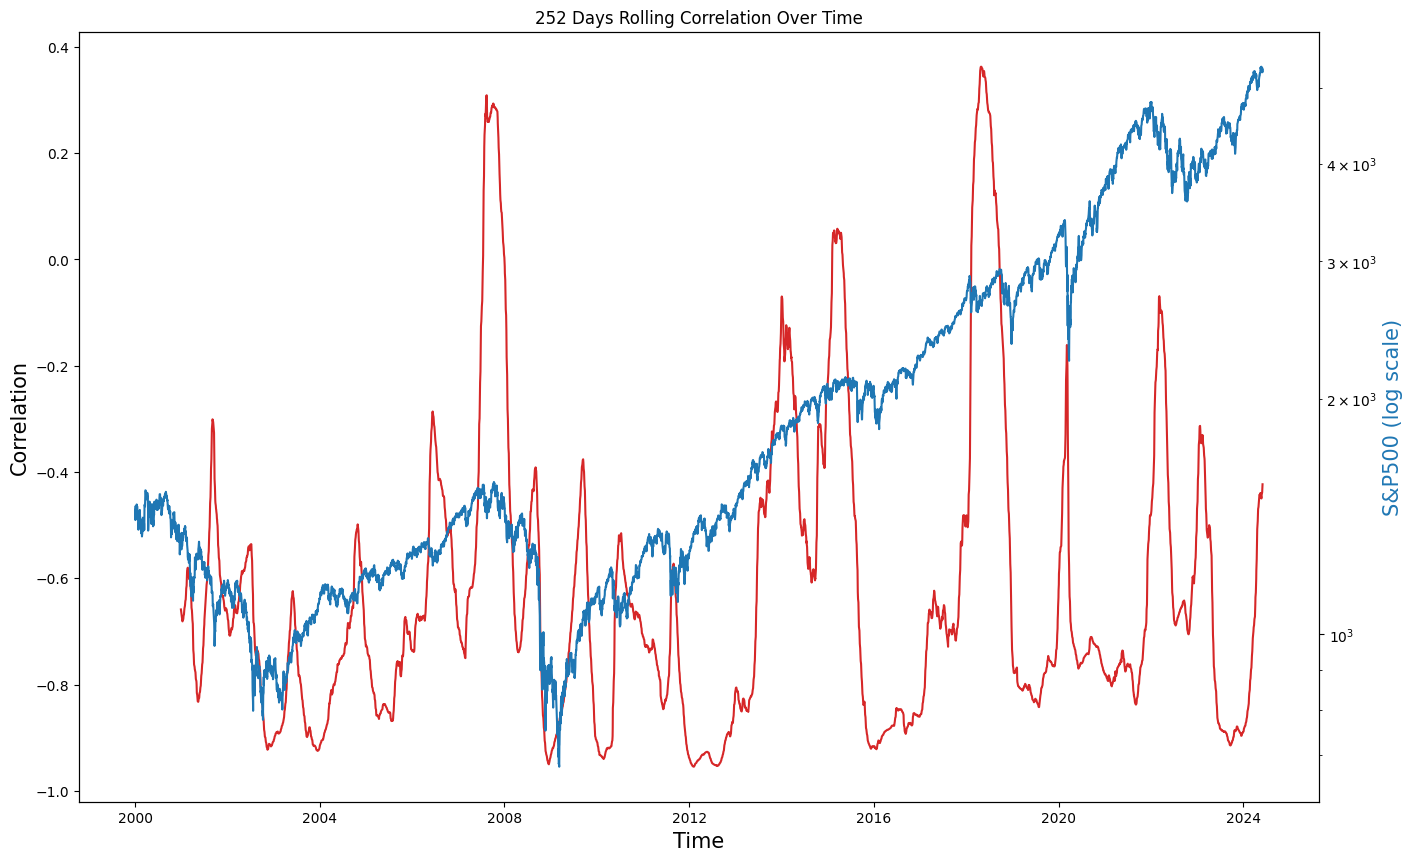

In [2]:
# Plot the rolling correlation with the trend of S&P500 overtime
rolling_correlation = sp500["Adj Close"].rolling(window=252).corr(vix["Adj Close"])

fig,ax1=plt.subplots(figsize=(16, 10))
color="tab:red"
ax1.plot(rolling_correlation.index, rolling_correlation.values,color=color)
plt.title('252 Days Rolling Correlation Over Time')
ax1.set_xlabel('Time',fontsize=15)
ax1.set_ylabel('Correlation',fontsize=15)
ax2=ax1.twinx()
color="tab:blue"
ax2.plot(sp500["Adj Close"],color=color)
ax2.set_yscale('log')  #make the graph easy to read
ax2.set_ylabel("S&P500 (log scale)",color=color,fontsize=15)
plt.show()

When S&P500 goes down, VIX goes up (and thus correlation goes down to negative). It rarely goes up to zero

But seems like when the correlation goes up, every peak of correlation comes with correction of S&P500

Can we trade with that pattern?

,sp500_next_day_return
0,0.037259
1,0.036699
2,0.019404
3,-0.006519
4,-0.035454
...,...
583,0.004540
584,0.008830
585,0.003524
586,-0.014169


mean of return:  sp500_next_day_return    0.001646
dtype: float64
Sharpe Ratio:  sp500_next_day_return    1.005843
dtype: float64


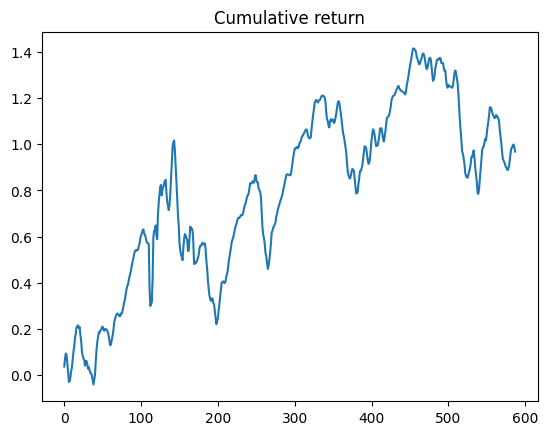

Cumulative return      sp500_next_day_return
587               0.968104


In [3]:
testing=pd.DataFrame({"sp500":sp500["Adj Close"],"vix":vix["Adj Close"],"rolling_corr_252_days":rolling_correlation})
testing["sp500_next_day_return"]=testing['sp500'].shift(-1)/testing['sp500'] -1
matching_dates=testing[testing["rolling_corr_252_days"]<=-0.9].index
result=pd.DataFrame()
days=5
for a in matching_dates:
    end_date = min(testing.index.get_loc(a) + days, len(testing))
    result =pd.concat([result,testing.iloc[testing.index.get_loc(a):end_date]])
    result.reset_index(drop=True, inplace=True)
grouped_result = result.groupby(np.arange(len(result)) //days).agg({'sp500_next_day_return': 'sum'}).reset_index(drop=True)
display(grouped_result)
print("mean of return: ", grouped_result.mean())
print("Sharpe Ratio: ", grouped_result.mean()/ grouped_result.std()*np.sqrt(252))
cumsum=grouped_result.cumsum()
plt.plot(cumsum)
plt.title("Cumulative return")
plt.show()
print("Cumulative return",cumsum[-1:])